In [9]:
pip install statsmodels


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 50.2 MB/s eta 0:00:0000:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 7.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import optimize

# Load data from CSV file
price_data = pd.read_csv('02_python_data.csv', index_col=0, parse_dates=True)
daily_returns = price_data.pct_change().iloc[1:, :]

# Display the first few rows of the data to verify
print(daily_returns.head())


              .GDAXI   SAPG.DE  SIEGn.DE  DTEGn.DE   AIRG.DE   ALVG.DE  \
Date                                                                     
2022-05-02 -0.011265 -0.010763 -0.022584 -0.015936 -0.014597 -0.005550   
2022-05-03  0.007203 -0.013056 -0.004864  0.004974  0.023855  0.009302   
2022-05-04 -0.004890 -0.018478  0.010649  0.008863 -0.035325 -0.015899   
2022-05-05 -0.004889  0.018505  0.006910  0.003537  0.061161 -0.064575   
2022-05-06 -0.016416 -0.037597 -0.016641 -0.016485 -0.014868 -0.020324   

             MBGn.DE  VOWG_p.DE   BMWG.DE   SHLG.DE  ...   CONG.DE   HEIG.DE  \
Date                                                 ...                       
2022-05-02 -0.072727  -0.011548 -0.011081 -0.020289  ... -0.053923 -0.009410   
2022-05-03  0.010608   0.020242  0.030139  0.003982  ...  0.029779  0.008769   
2022-05-04 -0.008747  -0.011185 -0.006377  0.030940  ... -0.015858  0.003622   
2022-05-05 -0.021338  -0.009022 -0.018120  0.020777  ... -0.043602 -0.022375   
2

MVP: Expected Return = 0.000679, Risk (Std. Dev.) = 0.0073, Sharpe Ratio = 0.093613
DAX: Expected Return = 0.000552, Risk (Std. Dev.) = 0.0121, Sharpe Ratio = 0.045643


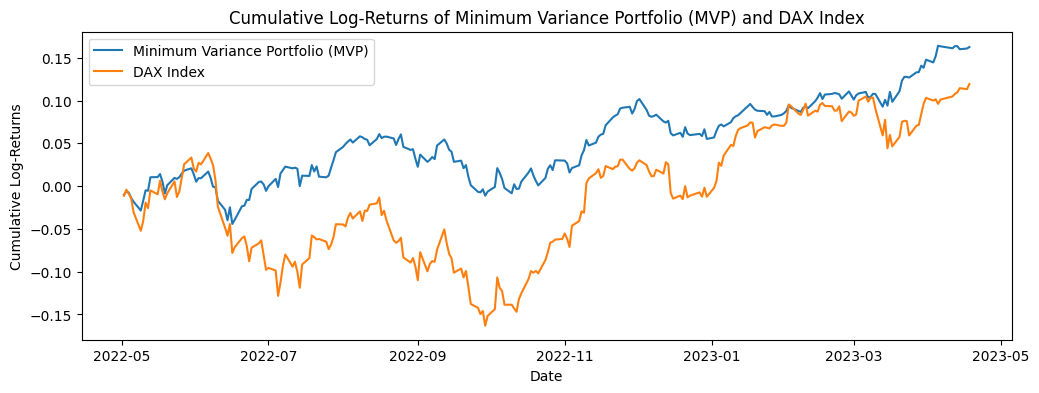

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import optimize

# Load data from CSV file
price_data = pd.read_csv('02_python_data.csv', index_col=0, parse_dates=True)
daily_returns = price_data.pct_change().iloc[1:, :]

# Covariance matrix of asset returns
cov_matrix = daily_returns.iloc[:, 1:].cov().values

# Expected returns of assets
expected_returns = daily_returns.iloc[:, 1:].mean().values

# Number of assets
num_assets = len(expected_returns)

# Objective function to minimize: Portfolio variance
def portfolio_variance(weights):
    return (weights @ cov_matrix @ weights) * 10000

# Constraints: weights must sum to 100%
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# Bounds: no short selling allowed (0 <= weight <= 1)
bounds = tuple((0, 1) for asset in range(num_assets))

# Initial guess: equally weighted portfolio
initial_guess = np.array(num_assets * [1.0 / num_assets])

# Minimize the portfolio variance
result = optimize.minimize(portfolio_variance, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)
optimal_weights = result.x

# Calculate the risk and return of the minimum variance portfolio (MVP)
risk_mvp = np.sqrt(optimal_weights @ cov_matrix @ optimal_weights)
return_mvp = optimal_weights @ expected_returns

# Risk and return of the DAX index
risk_dax = daily_returns.iloc[:, 0].std()
return_dax = daily_returns.iloc[:, 0].mean()

# Display the results
print(f'MVP: Expected Return = {return_mvp:.6f}, Risk (Std. Dev.) = {risk_mvp:.4f}, Sharpe Ratio = {return_mvp/risk_mvp:.6f}')
print(f'DAX: Expected Return = {return_dax:.6f}, Risk (Std. Dev.) = {risk_dax:.4f}, Sharpe Ratio = {return_dax/risk_dax:.6f}')

# Plot cumulative log-returns
plt.figure(figsize=(12, 4))
plt.plot(np.log(1 + daily_returns.iloc[:, 1:] @ optimal_weights).cumsum(), label='Minimum Variance Portfolio (MVP)')
plt.plot(np.log(1 + daily_returns.iloc[:, 0]).cumsum(), label='DAX Index')
plt.legend()
plt.title('Cumulative Log-Returns of Minimum Variance Portfolio (MVP) and DAX Index')
plt.xlabel('Date')
plt.ylabel('Cumulative Log-Returns')
plt.show()


                                 OLS Regression Results                                
Dep. Variable:                 .GDAXI   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              607.4
Date:                Tue, 14 May 2024   Prob (F-statistic):                   4.84e-195
Time:                        19:45:00   Log-Likelihood:                          1335.9
No. Observations:                 249   AIC:                                     -2594.
Df Residuals:                     210   BIC:                                     -2457.
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

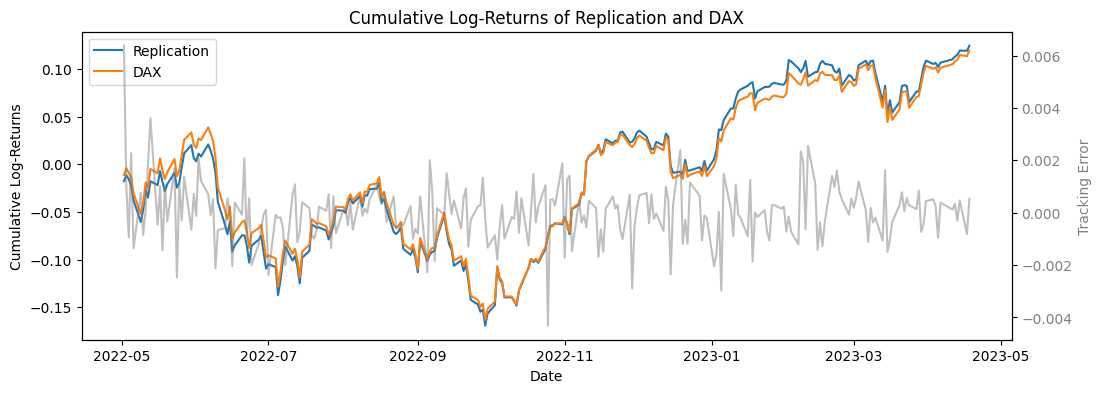

In [12]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
price_data = pd.read_csv('02_python_data.csv', index_col=0, parse_dates=True)
daily_returns = price_data.pct_change().iloc[1:, :]

# Fit a linear regression model
model = sm.OLS(daily_returns.iloc[:, 0], daily_returns.iloc[:, 1:]).fit()
# Extract the weights from the regression model coefficients
regression_weights = model.params

# Display the model summary
print(model.summary())

# Create the figure and subplots
fig, ax1 = plt.subplots(figsize=(12, 4))
# Create a second y-axis
ax2 = ax1.twinx()

# Plot cumulative log-returns for the replication portfolio and DAX on the first y-axis
ax1.plot(np.log(1 + daily_returns.iloc[:, 1:] @ regression_weights).cumsum(), label='Replication')
ax1.plot(np.log(1 + daily_returns.iloc[:, 0]).cumsum(), label='DAX')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Log-Returns')
ax1.legend(loc='upper left')

# Plot the tracking error on the second y-axis
tracking_error = daily_returns.iloc[:, 0] - (daily_returns.iloc[:, 1:] @ regression_weights)
ax2.plot(tracking_error, label='Tracking Error', color='grey', alpha=0.5)
ax2.set_ylabel('Tracking Error', color='grey')
ax2.tick_params(axis='y', labelcolor='grey')

# Set the title of the plot
plt.title('Cumulative Log-Returns of Replication and DAX')

# Show the plot
plt.show()


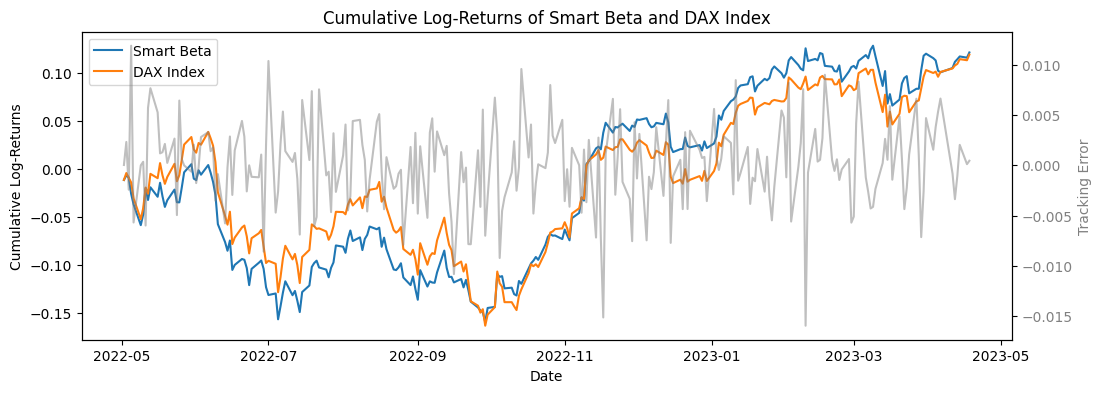

In [13]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load data from CSV file
price_data = pd.read_csv('02_python_data.csv', index_col=0, parse_dates=True)
daily_returns = price_data.pct_change().iloc[1:, :]

# Potential constituent tickers (excluding the DAX index)
constituent_tickers = daily_returns.drop(columns='.GDAXI').columns

# Generate all possible combinations of 3 tickers
ticker_combinations = list(itertools.combinations(constituent_tickers, 3))

model_results = {}
for tickers in ticker_combinations:
    # Select data for the current combination of tickers
    X = daily_returns[list(tickers)]
    # Fit the linear regression model
    model = sm.OLS(daily_returns.iloc[:, 0], X).fit()
    # Store the R-squared and parameters
    model_results[model.rsquared] = model.params

# Identify the best model with the highest R-squared
best_model_params = model_results[max(model_results.keys())]

# Create the figure and subplots
fig, ax1 = plt.subplots(figsize=(12, 4))
# Create a second y-axis
ax2 = ax1.twinx()

# Plot cumulative log-returns for the Smart Beta portfolio and DAX on the first y-axis
ax1.plot(np.log(1 + daily_returns[best_model_params.index] @ best_model_params).cumsum(), label='Smart Beta')
ax1.plot(np.log(1 + daily_returns.iloc[:, 0]).cumsum(), label='DAX Index')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Log-Returns')
ax1.legend(loc='upper left')

# Plot the tracking error on the second y-axis
tracking_error = daily_returns.iloc[:, 0] - (daily_returns[best_model_params.index] @ best_model_params)
ax2.plot(tracking_error, label='Tracking Error', color='grey', alpha=0.5)
ax2.set_ylabel('Tracking Error', color='grey')
ax2.tick_params(axis='y', labelcolor='grey')

# Set the title of the plot
plt.title('Cumulative Log-Returns of Smart Beta and DAX Index')

# Show the plot
plt.show()
